In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split



student_data= pd.read_csv('data.csv')


ANALYSING DATA

In [2]:
student_data.isnull().sum()



ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
High-Salary              0
dtype: int64

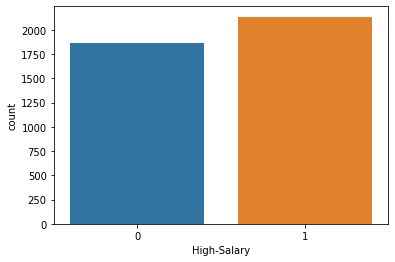

In [3]:
sns.countplot(x='High-Salary',data=student_data)

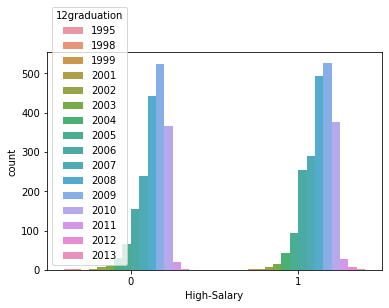

In [4]:
sns.countplot(x='High-Salary',hue='12graduation',data=student_data)

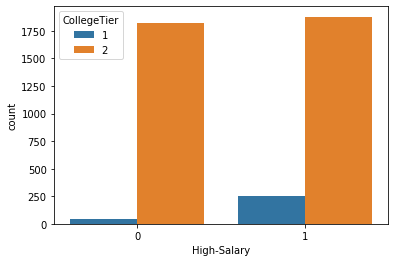

In [5]:
sns.countplot(x='High-Salary',hue='CollegeTier',data=student_data)


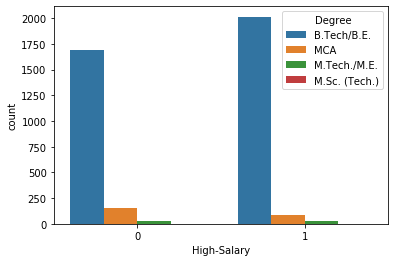

In [6]:
sns.countplot(x='High-Salary',hue='Degree',data=student_data)

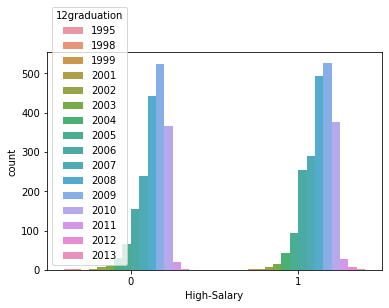

In [7]:
sns.countplot(x='High-Salary',hue='12graduation',data=student_data)

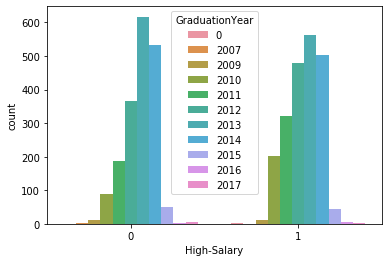

In [8]:
sns.countplot(x='High-Salary',hue='GraduationYear',data=student_data)

DATA WRANGLING

In [9]:
gender=pd.get_dummies(student_data['Gender'])
degree=pd.get_dummies(student_data['Degree'])
tier=pd.get_dummies(student_data['CollegeTier'])
student_data=pd.concat([student_data,tier],axis=1)
student_data.drop(['CollegeTier','ID','DOB','Gender', 'CollegeID','Degree','CollegeCityID'],axis=1,inplace=True)
ctier=pd.get_dummies(student_data['CollegeCityTier'])
graduation12=pd.get_dummies(student_data['12graduation'])
graduation_year=pd.get_dummies(student_data['GraduationYear'])
specialization=pd.get_dummies(student_data['Specialization'])
student_data=pd.concat([student_data,graduation_year,specialization,graduation12,ctier],axis=1)
student_data.drop(['Specialization','GraduationYear','12graduation','10board','Domain','Logical','12board','CollegeState','CollegeCityTier'],axis=1,inplace=True)

In [10]:
student_data.head(5)

,10percentage,12percentage,collegeGPA,English,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,...,2006,2007,2008,2009,2010,2011,2012,2013,0,1
0,84.3,95.8,78.00,515,525,445,-1,-1,-1,-1,...,0,1,0,0,0,0,0,0,1,0
1,85.4,85.0,70.06,695,780,-1,466,-1,-1,-1,...,0,1,0,0,0,0,0,0,1,0
2,85.0,68.2,70.00,615,370,395,-1,-1,-1,-1,...,0,0,0,0,1,0,0,0,1,0
3,85.6,83.6,74.64,635,625,615,-1,-1,-1,-1,...,0,1,0,0,0,0,0,0,0,1
4,78.0,76.8,73.90,545,465,-1,233,-1,-1,-1,...,0,0,1,0,0,0,0,0,1,0


TRAIN DATA

In [11]:

y=student_data['High-Salary']


In [12]:
X=student_data.drop('High-Salary',axis=1)

TESTING DATA(1)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()

X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression


logmod=LogisticRegression()


logmod.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
pred=logmod.predict(X_test)

from sklearn.metrics import classification_report


classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.68      0.72       191\n           1       0.73      0.80      0.76       209\n\n    accuracy                           0.74       400\n   macro avg       0.74      0.74      0.74       400\nweighted avg       0.74      0.74      0.74       400\n'

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.7425

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred )
cm = cm.astype('float') / cm.sum(axis=1)
confusion_matrix(y_test,pred )

array([[130,  61],
       [ 42, 167]])

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  130
False Positives:  61
False Negatives:  42
True Positives:  167


In [18]:
print(cm)

[[0.68062827 0.29186603]
 [0.21989529 0.79904306]]


In [19]:
print(cm.diagonal());

[0.68062827 0.79904306]


testing data(2)

In [20]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X1=StandardScaler()

X_train1=sc_X1.fit_transform(X_train1)
X_test1=sc_X1.transform(X_test1)

from sklearn.linear_model import LogisticRegression


logmod=LogisticRegression() 


logmod.fit(X_train1,y_train1)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
pred1=logmod.predict(X_test1)

from sklearn.metrics import classification_report


classification_report(y_test1,pred1)

'              precision    recall  f1-score   support\n\n           0       0.70      0.67      0.68       376\n           1       0.72      0.74      0.73       424\n\n    accuracy                           0.71       800\n   macro avg       0.71      0.70      0.70       800\nweighted avg       0.71      0.71      0.71       800\n'

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1,pred1)

0.70625

In [23]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test1,pred1 )
cm1= cm1.astype('float') / cm1.sum(axis=1)
confusion_matrix(y_test1,pred1 )

array([[251, 125],
       [110, 314]])

In [24]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test1, pred1).ravel()
print("True Negatives: ",tn1)
print("False Positives: ",fp1)
print("False Negatives: ",fn1)
print("True Positives: ",tp1)

True Negatives:  251
False Positives:  125
False Negatives:  110
True Positives:  314


In [25]:
print(cm1)

[[0.66755319 0.29481132]
 [0.29255319 0.74056604]]


In [26]:
print(cm1.diagonal());

[0.66755319 0.74056604]


TESTING DATA(3)

In [27]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X2=StandardScaler()

X_train2=sc_X2.fit_transform(X_train2)
X_test2=sc_X2.transform(X_test2)

from sklearn.linear_model import LogisticRegression


logmod=LogisticRegression()


logmod.fit(X_train2,y_train2)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred2=logmod.predict(X_test2)

from sklearn.metrics import classification_report


classification_report(y_test2,pred2)

'              precision    recall  f1-score   support\n\n           0       0.68      0.66      0.67       548\n           1       0.72      0.74      0.73       652\n\n    accuracy                           0.70      1200\n   macro avg       0.70      0.70      0.70      1200\nweighted avg       0.70      0.70      0.70      1200\n'

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test2,pred2)

0.7041666666666667

In [30]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test2,pred2 )
cm2= cm2.astype('float') / cm2.sum(axis=1)
confusion_matrix(y_test2,pred2 )

array([[363, 185],
       [170, 482]])

In [31]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test2, pred2).ravel()
print("True Negatives: ",tn2)
print("False Positives: ",fp2)
print("False Negatives: ",fn2)
print("True Positives: ",tp2)

True Negatives:  363
False Positives:  185
False Negatives:  170
True Positives:  482


In [32]:
print(cm2)

[[0.66240876 0.28374233]
 [0.31021898 0.7392638 ]]


In [33]:

print(cm2.diagonal());

[0.66240876 0.7392638 ]
